<a href="https://colab.research.google.com/github/Alfinnn24/PCVK_Ganjil_2025/blob/master/Modul_5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM**

# Buat Gamma Correction sesuai dengan petunjuk berikut

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


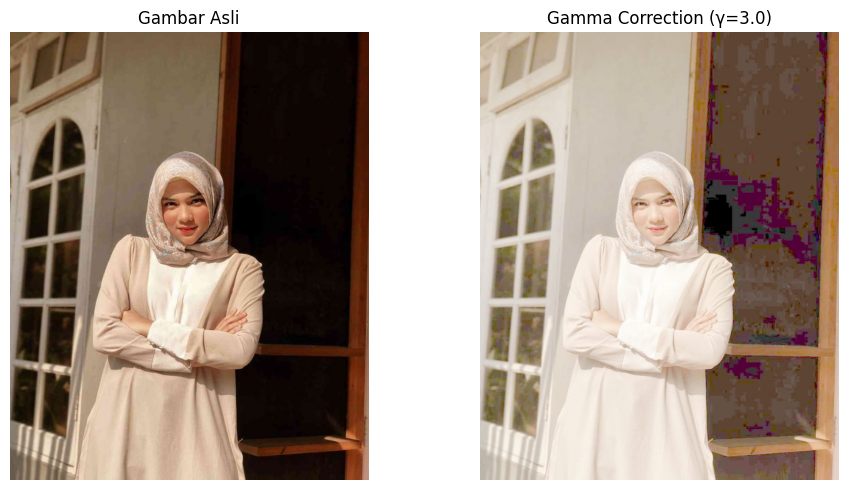

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

print(' Gamma Correction pada citra ')
print('----------------------------------')

# Input nilai gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:  # Jika input bukan angka
    print('Error, not a number')
    exit()

# Path lokasi gambar di Google Drive
img_path = '/content/drive/MyDrive/PCVK/images/female.jpg'

# Membaca gambar menggunakan OpenCV
img = cv2.imread(img_path)
if img is None:  # Mengecek apakah gambar berhasil dibaca
    print("Gambar tidak ditemukan!")
    print("Pastikan path sudah benar:", img_path)
    exit()

# Normalisasi nilai piksel menjadi rentang [0, 1]
img_normalized = img / 255.0

# Melakukan Gamma Correction
gamma_corrected = np.power(img_normalized, 1.0 / gamma)

# Mengubah kembali ke rentang [0, 255] untuk ditampilkan
gamma_corrected = np.uint8(gamma_corrected * 255)

# Menampilkan gambar asli dan hasil gamma correction
plt.figure(figsize=(10, 5))  # Ukuran figure

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Mengubah dari BGR ke RGB
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan gambar hasil gamma correction
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (γ={gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()

# Buat Simulasi Image Depth

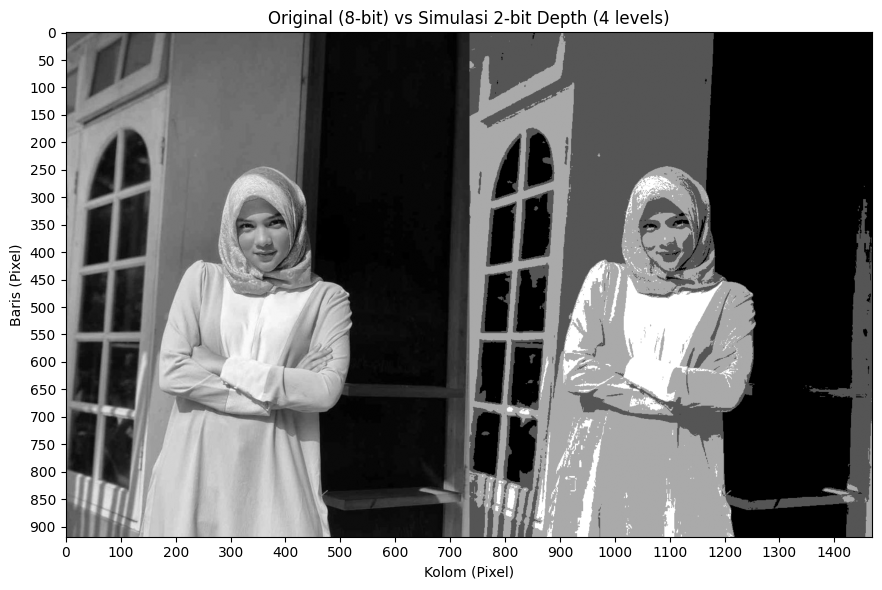

Dimensi gambar asli: (919, 735)
Dimensi gabungan: (919, 1470)


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Set bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Baca gambar grayscale
img_path = '/content/drive/MyDrive/PCVK/images/female.jpg'
original = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

if original is not None:
    # Kuantisasi
    quantized = np.round(original / level) * level
    depth_image = quantized.astype(original.dtype)

    # Gabungkan gambar (horizontal stack → lebar 2x lipat)
    combined_image = np.hstack((original, depth_image))

    # Ambil dimensi
    rows, cols = combined_image.shape

    # Tampilkan hasil
    plt.figure(figsize=(12, 6))
    plt.imshow(combined_image, cmap='gray')
    plt.title(f'Original (8-bit) vs Simulasi {bit_depth}-bit Depth ({2**bit_depth} levels)')

    # Set ticks sesuai ukuran gambar
    plt.xlabel('Kolom (Pixel)')
    plt.ylabel('Baris (Pixel)')
    plt.xticks(np.arange(0, cols+1, 100))  # setiap 100 kolom
    plt.yticks(np.arange(0, rows+1, 50))   # setiap 50 baris

    plt.tight_layout()
    plt.show()

    # Info tambahan
    print(f"Dimensi gambar asli: {original.shape}")
    print(f"Dimensi gabungan: {combined_image.shape}")
else:
    print("Gambar tidak ditemukan!")

# Buat modul Average Denoising

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Memeriksa Kebutuhan Gambar Praktikum ===
Folder 'noises' tidak ditemukan. Membuat folder dan 100 gambar noise...
Selesai! 100 gambar noise berhasil dibuat.

=== Memulai Proses Average Denoising ===
Berhasil memuat 100 gambar noise dan 1 gambar asli.
Memproses gambar dan menghitung PSNR...
PSNR dengan 5 gambar: 37.48 dB
PSNR dengan 10 gambar: 39.38 dB
PSNR dengan 20 gambar: 40.78 dB
PSNR dengan 40 gambar: 41.69 dB
PSNR dengan 80 gambar: 42.23 dB
PSNR dengan 100 gambar: 42.34 dB


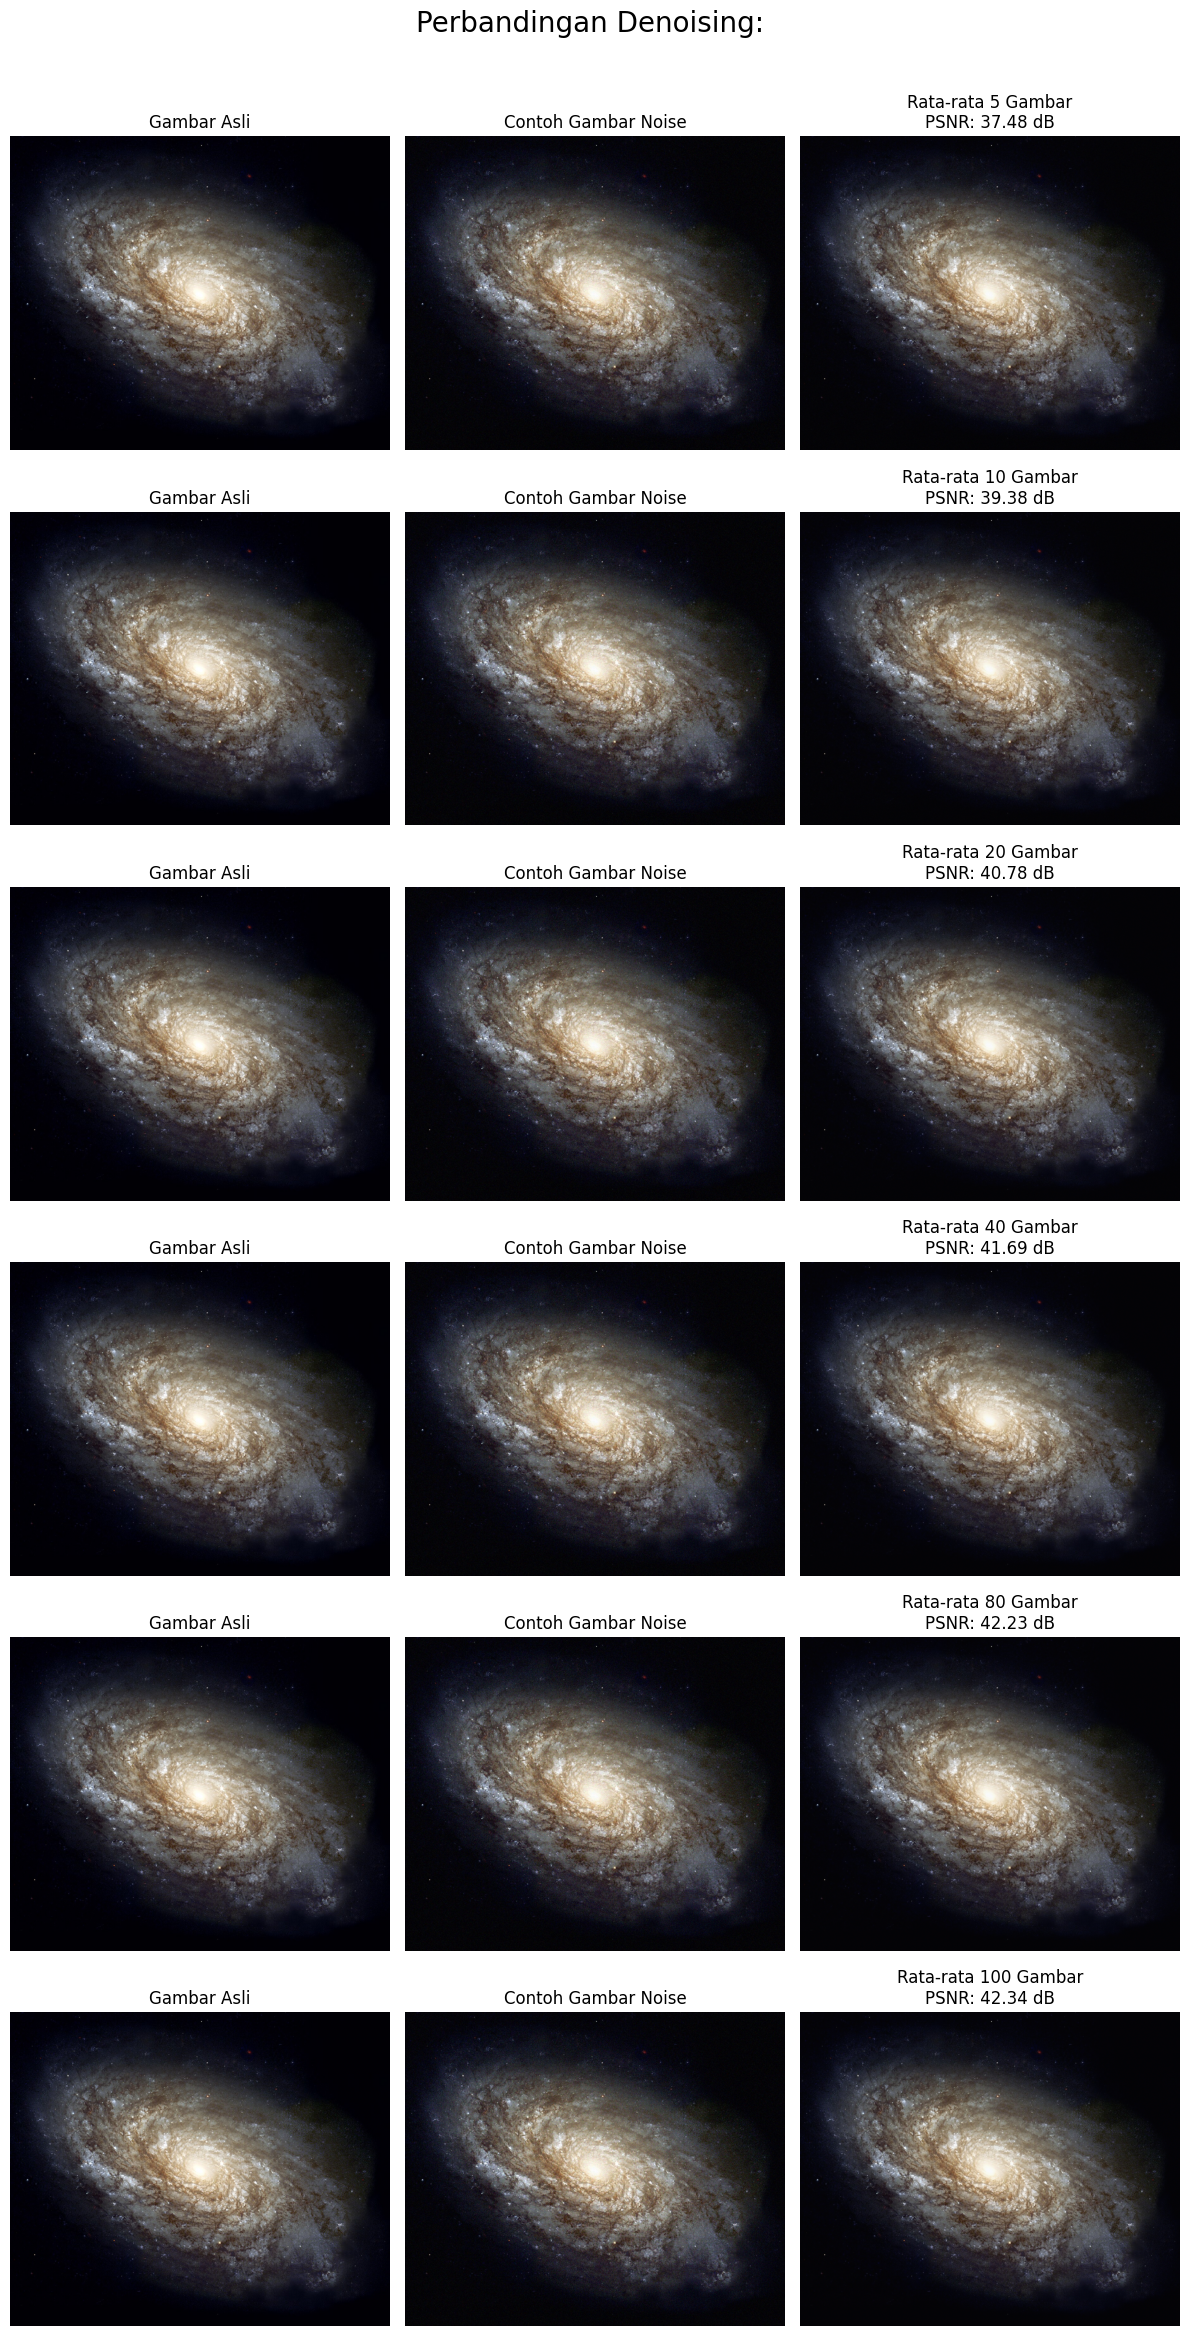

In [5]:
import cv2 as cv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from google.colab import drive

# PERSIAPAN AWAL
# Selalu mount drive untuk memastikan koneksi
drive.mount('/content/drive')

# Tentukan semua path yang dibutuhkan di awal
base_path = "/content/drive/MyDrive/PCVK/images"
img_path_original = os.path.join(base_path, "galaxy.jpg")
noises_folder_path = os.path.join(base_path, "noises")

# BAGIAN 1: PEMBUATAN GAMBAR NOISE SECARA OTOMATIS

print("=== Memeriksa Kebutuhan Gambar Praktikum ===")

original_img = cv.imread(img_path_original)

if original_img is None:
    print(f"!! ERROR: Gambar asli 'galaxy.jpg' tidak ditemukan di {base_path}")
    print("!! Pastikan file galaxy.jpg sudah ada sebelum melanjutkan.")
else:
    if not os.path.exists(noises_folder_path):
        print(f"Folder 'noises' tidak ditemukan. Membuat folder dan 100 gambar noise...")
        os.makedirs(noises_folder_path) # Buat folder

        # Proses pembuatan 100 gambar noise
        for i in range(100):
            noisy_image = original_img.copy()
            mean = 0
            var = 100
            sigma = var**0.5
            gaussian_noise = np.random.normal(mean, sigma, original_img.shape)
            noisy_image = cv.add(noisy_image.astype(np.float64), gaussian_noise)
            noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
            cv.imwrite(os.path.join(noises_folder_path, f"noise_{i+1:03d}.jpg"), noisy_image)

        print("Selesai! 100 gambar noise berhasil dibuat.")
    else:
        print("Folder 'noises' sudah ada. Proses pembuatan gambar dilewati.")

    # BAGIAN 2: PROSES AVERAGE DENOISING DAN PLOTTING

    print("\n=== Memulai Proses Average Denoising ===")

    # Muat semua gambar dari folder noises
    img_path_noise = os.path.join(noises_folder_path, "*.jpg")
    cv_img = [cv.imread(file) for file in glob.glob(img_path_noise)]

    if not cv_img:
        print("!! ERROR: Gagal memuat gambar dari folder 'noises' meskipun folder ada.")
    else:
        print(f"Berhasil memuat {len(cv_img)} gambar noise dan 1 gambar asli.")

        def PSNR(original, processed):
            mse = np.mean((original.astype(np.float64) - processed.astype(np.float64)) ** 2)
            if mse == 0: return 100
            max_pixel = 255.0
            return 20 * np.log10(max_pixel / np.sqrt(mse))

        jumlah_citra = [5, 10, 20, 40, 80, 100]
        hasil_gambar = {}

        print("Memproses gambar dan menghitung PSNR...")
        for n in jumlah_citra:
            imgs_to_average = cv_img[:n]
            sum_img = np.sum([img.astype(np.float64) for img in imgs_to_average], axis=0)
            avg_img = np.uint8(sum_img / n)
            hasil_gambar[n] = avg_img
            psnr_value = PSNR(original_img, avg_img)
            print(f"PSNR dengan {n} gambar: {psnr_value:.2f} dB")

        # Tampilkan plot perbandingan
        sample_noise_img = cv_img[0]
        fig, axes = plt.subplots(len(jumlah_citra), 3, figsize=(12, 24))
        fig.suptitle("Perbandingan Denoising: ", fontsize=20)

        for i, n in enumerate(jumlah_citra):
            img_hasil = hasil_gambar[n]
            psnr_val = PSNR(original_img, img_hasil)

            axes[i, 0].imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
            axes[i, 0].set_title(f"Gambar Asli")
            axes[i, 0].axis('off')

            axes[i, 1].imshow(cv.cvtColor(sample_noise_img, cv.COLOR_BGR2RGB))
            axes[i, 1].set_title(f"Contoh Gambar Noise")
            axes[i, 1].axis('off')

            axes[i, 2].imshow(cv.cvtColor(img_hasil, cv.COLOR_BGR2RGB))
            axes[i, 2].set_title(f"Rata-rata {n} Gambar\nPSNR: {psnr_val:.2f} dB")
            axes[i, 2].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

Kesimpulan: dari hasil yang diperoleh, dapat disimpulkan bahwa metode average denoising sangat efektif dalam mengurangi noise pada citra. Efektivitas ini terlihat dari peningkatan nilai PSNR yang terjadi secara konsisten seiring bertambahnya jumlah gambar yang dirata-ratakan, yaitu meningkat dari 37,48 dB saat menggunakan 5 gambar menjadi 42,34 dB ketika menggunakan 100 gambar. Peningkatan nilai PSNR tersebut menunjukkan bahwa kualitas gambar hasil pemrosesan semakin baik dan semakin mendekati kondisi gambar aslinya yang bersih. Selain itu, hasil data juga memperlihatkan adanya efek diminishing returns, di mana peningkatan kualitas paling besar terjadi pada tahap awal, sementara penambahan jumlah gambar di tahap akhir hanya memberikan peningkatan yang lebih kecil.

# Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


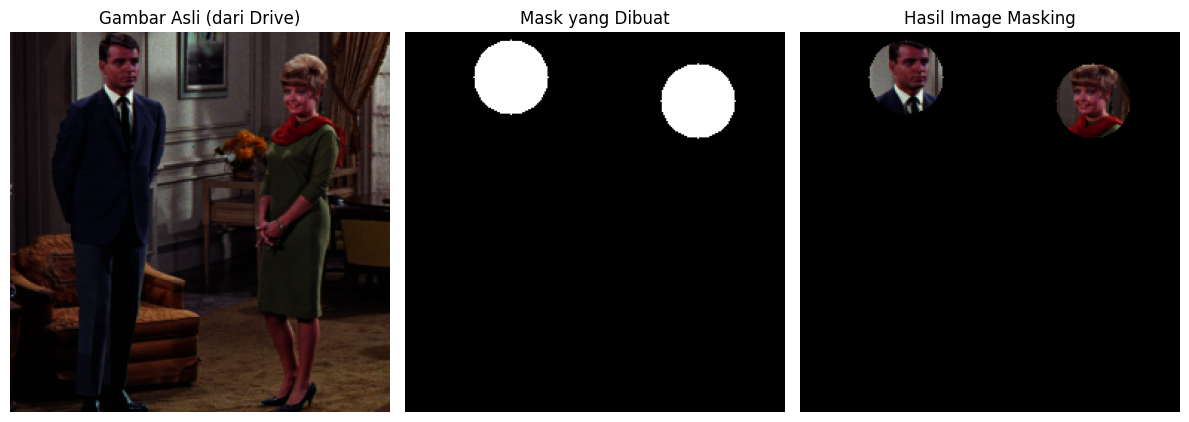

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

# Path ke gambar asli di dalam Drive
img_path = '/content/drive/MyDrive/PCVK/images/couple.tiff'
img = cv.imread(img_path)

if img is None:
    print(f"ERROR: Gagal memuat gambar dari path: {img_path}")
    print("Pastikan path sudah benar!")
else:
    # Konversi warna ke RGB agar tampil benar di Matplotlib
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # LANGKAH 1: MEMBUAT MASK
    # Buat kanvas hitam seukuran gambar asli
    mask = np.zeros(img.shape[:2], dtype="uint8")
    height, width = img.shape[:2]

    center_kiri = (int(width * 0.28), int(height * 0.12))
    center_kanan = (int(width * 0.77), int(height * 0.18))
    radius = int(height * 0.10)

    cv.circle(mask, center_kiri, radius, 255, -1)
    cv.circle(mask, center_kanan, radius, 255, -1)

    # LANGKAH 2: MENERAPKAN MASK
    # Gunakan operasi bitwise AND
    masked_img = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

    # LANGKAH 3: MENAMPILKAN HASIL
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Gambar Asli (dari Drive)')
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Mask yang Dibuat')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Hasil Image Masking')
    plt.imshow(masked_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Menampilkan hasil untuk setiap operator logika...


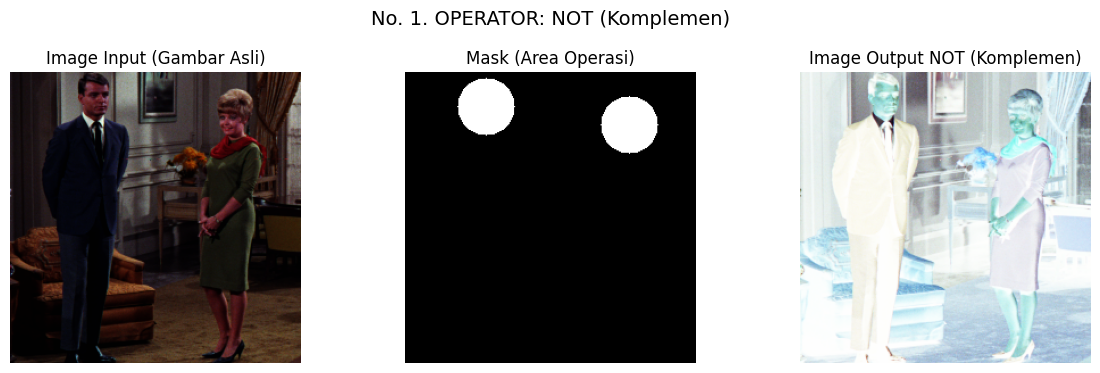

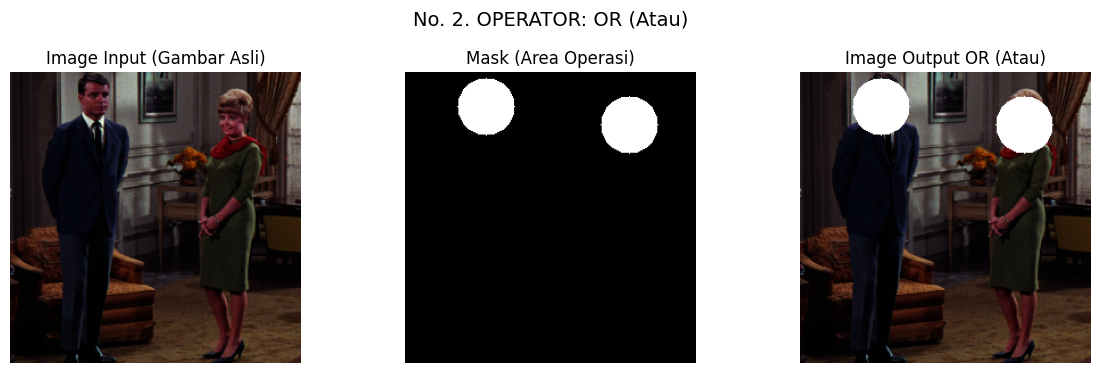

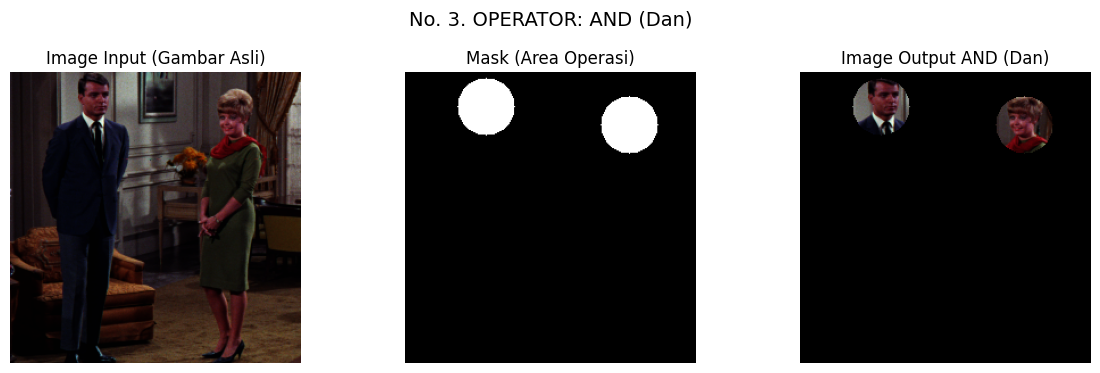

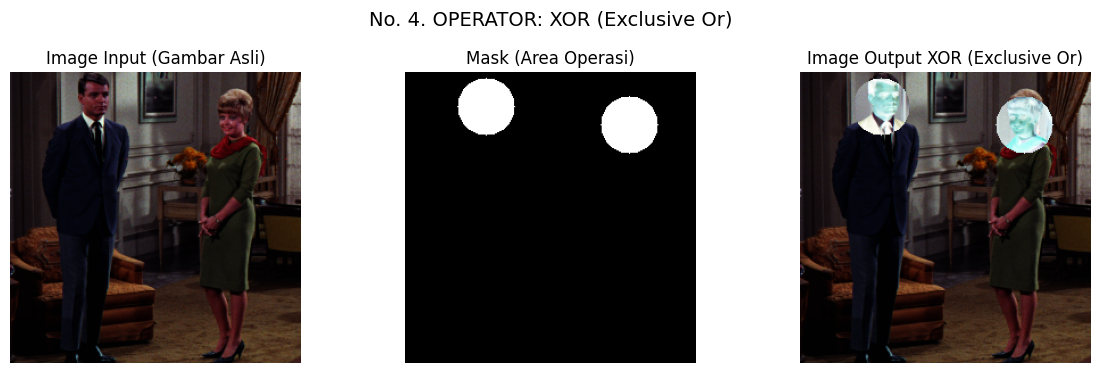

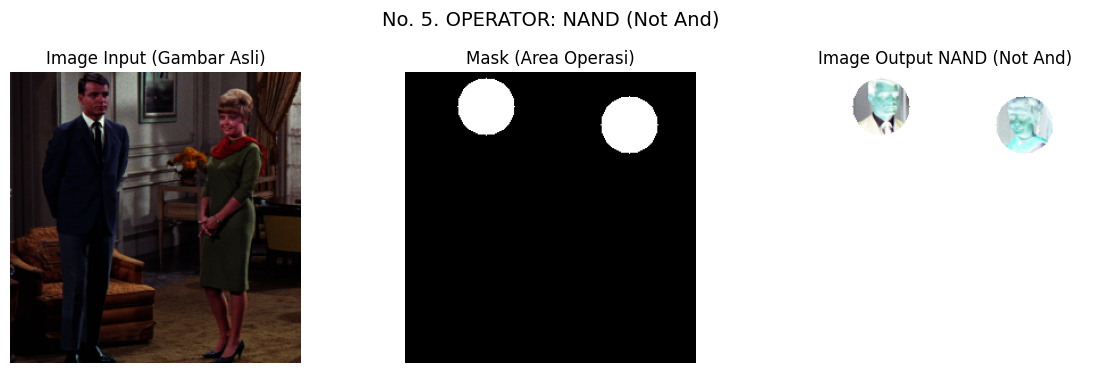

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

# Path ke gambar asli di dalam Drive
img_path = '/content/drive/MyDrive/PCVK/images/couple.tiff'
img_a = cv.imread(img_path)

# Pengecekan untuk memastikan gambar berhasil dimuat
if img_a is None:
    print(f"ERROR: Gagal memuat gambar dari path: {img_path}")
    print("Pastikan path sudah benar!")
else:
    # --- Persiapan Gambar dan Mask ---
    img_a_rgb = cv.cvtColor(img_a, cv.COLOR_BGR2RGB)

    # Membuat mask (Image Input B) menggunakan parameter Anda
    mask_b = np.zeros(img_a.shape[:2], dtype="uint8")
    height, width = img_a.shape[:2]

    center_kiri = (int(width * 0.28), int(height * 0.12))
    center_kanan = (int(width * 0.77), int(height * 0.18))
    radius = int(height * 0.10)

    cv.circle(mask_b, center_kiri, radius, 255, -1)
    cv.circle(mask_b, center_kanan, radius, 255, -1)

    # --- Hitung semua hasil operator dengan logika yang sudah diperbaiki ---

    # Konversi mask menjadi 3-channel agar bisa dioperasikan dengan gambar berwarna
    mask_b_3channel = cv.cvtColor(mask_b, cv.COLOR_GRAY2BGR)

    # 1. NOT: Diterapkan pada gambar asli (sesuai contoh modul)
    output_not = cv.bitwise_not(img_a_rgb)

    # 2. OR: Antara gambar asli dan mask (menghasilkan efek tempelan)
    output_or = cv.bitwise_or(img_a_rgb, mask_b_3channel)

    # 3. AND: Menggunakan mask untuk memotong gambar (cutout)
    output_and = cv.bitwise_and(img_a_rgb, img_a_rgb, mask=mask_b)

    # 4. XOR: Antara gambar asli dan mask (menghasilkan efek negatif di dalam mask)
    output_xor = cv.bitwise_xor(img_a_rgb, mask_b_3channel)

    # 5. NAND: Kebalikan dari hasil AND
    output_nand = cv.bitwise_not(output_and)

    # --- Siapkan daftar untuk looping plot ---
    operator_list = [
        ("NOT (Komplemen)", output_not),
        ("OR (Atau)", output_or),
        ("AND (Dan)", output_and),
        ("XOR (Exclusive Or)", output_xor),
        ("NAND (Not And)", output_nand)
    ]

    # --- Loop untuk membuat 5 plot terpisah ---
    print("\nMenampilkan hasil untuk setiap operator logika...")
    for i, (title, result_img) in enumerate(operator_list):

        # Buat figure baru untuk setiap operator
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        fig.suptitle(f"No. {i+1}. OPERATOR: {title}", fontsize=14, y=0.92)

        # Kolom 1: Gambar Input (selalu sama)
        axes[0].imshow(img_a_rgb)
        axes[0].set_title("Image Input (Gambar Asli)")
        axes[0].axis('off')

        # Kolom 2: Mask (selalu sama)
        axes[1].imshow(mask_b, cmap='gray')
        axes[1].set_title("Mask (Area Operasi)")
        axes[1].axis('off')

        # Kolom 3: Image Output (berubah sesuai operator)
        axes[2].imshow(result_img)
        axes[2].set_title(f"Image Output {title}")
        axes[2].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()
        print("=" * 90)

**HASIL ANALISA**

Berdasarkan hasil output dari berbagai macam operator logika, diperoleh penjelasan sebagai berikut:

1. Operator NOT (Komplemen)
Operator NOT berfungsi untuk membalikkan nilai setiap piksel pada citra. Pada gambar berwarna 8-bit, setiap komponen warna (R, G, B) dengan nilai P akan diubah menjadi 255 - P. Akibatnya, area yang semula terang menjadi gelap, dan sebaliknya. Setiap warna juga berubah menjadi warna kebalikannya (misalnya, merah berubah menjadi sian). Hasil akhir dari operasi ini adalah citra negatif dari gambar aslinya.

2. Operator OR (Atau)
Operator OR menghasilkan piksel aktif apabila piksel pada gambar asli atau pada mask memiliki nilai aktif. Karena area lingkaran pada mask berwarna putih (nilai 255), setiap piksel di bagian tersebut akan menghasilkan warna putih saat dioperasikan dengan gambar asli. Inilah sebabnya area lingkaran tampak putih solid di hasil akhir, sementara bagian luar lingkaran tetap sama seperti gambar aslinya karena dioperasikan dengan warna hitam (nilai 0).

3. Operator AND (Dan)
Operator AND hanya mempertahankan piksel yang aktif apabila piksel pada gambar asli dan pada mask sama-sama aktif. Dengan kata lain, hanya bagian gambar yang berada di dalam area putih pada mask yang akan terlihat, sedangkan area di luar lingkaran (yang bernilai hitam) akan menjadi hitam seluruhnya. Oleh karena itu, operator ini sangat cocok digunakan untuk proses masking atau pemotongan bagian tertentu dari gambar.

4. Operator NAND (Not And)
Operator NAND merupakan kebalikan dari operasi AND. Hasil yang diperoleh adalah citra negatif dari keluaran AND. Area yang sebelumnya merupakan hasil potongan gambar (hasil dari operasi AND) akan menjadi negatif, sedangkan bagian latar belakang yang awalnya hitam akan berubah menjadi putih.

5. Operator XOR (Exclusive Or)
Operator XOR menghasilkan piksel aktif jika piksel aktif hanya pada salah satu dari dua gambar, namun tidak pada keduanya.

- ada bagian luar lingkaran, piksel gambar asli dioperasikan dengan piksel hitam (nilai 0) dari mask. Karena hanya satu yang aktif, piksel asli tetap dipertahankan.

- Pada bagian dalam lingkaran, piksel gambar asli dioperasikan dengan piksel putih (nilai 255). Operasi ini menyebabkan setiap piksel berubah menjadi 255 - Piksel, sehingga area dalam lingkaran tampak seperti versi negatif dari gambar asli.